In [2]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv('../data/csv/02-SimpleLinearRegression.csv')
#df

# Chapter11
## 11.1 Tutorial Data Set

In [28]:
x = list(df['Simple Linear Regression'][3:8])
x = [int(n) for n in x]

In [102]:
y = list(df['Unnamed: 1'][3:8])
y = [int(n) for n in y]

Text(0,0.5,'y')

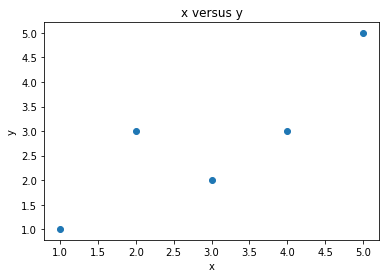

In [103]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(x,y)

ax.set_title('x versus y')
ax.set_xlabel('x')
ax.set_ylabel('y')

## 11.2 Simple Linear Regression

In [38]:
import statistics
mean_x = statistics.mean(x)
mean_x

3

In [40]:
# x-mean(x) --> diff_x
diff_x = []
for i in x:
    print(i-mean_x)
    diff_x.append(i-mean_x)

-2
-1
1
0
2


In [104]:
mean_y = statistics.mean(y)
mean_y

2.8

In [45]:
# y-mean(y) --> diff_y

diff_y = []
for n in y:
    print(round(n-mean_y, 1))
    diff_y.append(round(n-mean_y, 1))

-1.8
0.2
0.2
-0.8
2.2


In [56]:
# Multiplication x-mean(x)*y-mean(y)
multiplication = []
for i in range(len(diff_y)):
    multiplication.append(diff_x[i]*diff_y[i])
    
print(multiplication)
print("Sum："+str(sum(multiplication)))

[3.6, -0.2, 0.2, -0.0, 4.4]
Sum：8.0


In [57]:
# Squared residual of each x value from the mean.
squared_x = []

for j in diff_x:
    squared_x.append(j**2)
    
print(squared_x)
print("Sum："+str(sum(squared_x)))

[4, 1, 1, 0, 4]
Sum：10


In [59]:
B1 = sum(multiplication)/sum(squared_x)
B1

0.8

In [65]:
B0 = round(mean_y - B1*mean_x, 1)
B0

0.4

## 11.3 Making Predictions

In [68]:
predicted_Y = []
for i in x:
    predicted_Y.append(round(B0+B1*i,1))
predicted_Y

[1.2, 2.0, 3.6, 2.8, 4.4]

Text(0,0.5,'y')

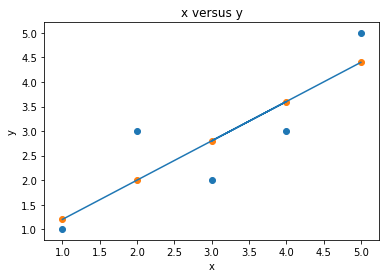

In [70]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(x,y)
ax.scatter(x,predicted_Y)
plt.plot(x,predicted_Y)
ax.set_title('x versus y')
ax.set_xlabel('x')
ax.set_ylabel('y')

In [73]:
# Error for predicted values
diff_predicted = []
for i in range(len(predicted_Y)):
    diff_predicted.append(round(predicted_Y[i]-y[i],1))
diff_predicted

[0.2, -1.0, 0.6, 0.8, -0.6]

In [77]:
# squared error
squared_error = []
for i in diff_predicted:
    squared_error.append(round(i**2,2))
print(squared_error)
print("Sum："+str(sum(squared_error)))

[0.04, 1.0, 0.36, 0.64, 0.36]
Sum：2.4


In [79]:
# RMSE
RMSE = (sum(squared_error)/len(squared_error))**0.5
RMSE

0.6928203230275509

## 11.5 Shortcut

In [91]:
corr = np.corrcoef(x,y)[1][0]
print(corr)
print(statistics.stdev(x))
print(statistics.stdev(y))

B1 = corr*statistics.stdev(y)/statistics.stdev(x)
B0 = corr*statistics.stdev(x)/statistics.stdev(y)

print(round(B1,1))

0.8528028654224417
1.5811388300841898
1.4832396974191326
0.8


# Chapter12
## 12.1 Tutorial Data Set

In [92]:
df = pd.read_csv('../data/csv/03-SimpleLinearRegressionGradientDescent.csv')

[1, 2, 4, 3, 5] [1, 3, 3, 2, 5]


Text(0,0.5,'y')

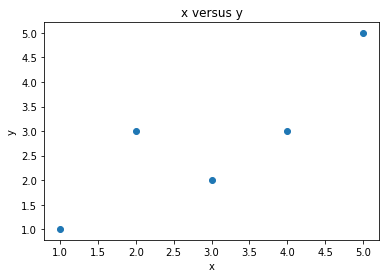

In [101]:
x = list(df['Unnamed: 1'][10:15])
x = [int(n) for n in x]

y = list(df['Unnamed: 2'][10:15])
y = [int(n) for n in y]
print(x,y)

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(x,y)

ax.set_title('x versus y')
ax.set_xlabel('x')
ax.set_ylabel('y')

In [112]:
# import data
x = list(df['Unnamed: 1'][10:30])
x = [int(n) for n in x]
print(x)
y = list(df['Unnamed: 2'][10:30])
y = [int(n) for n in y]
print(y)
w0 = list(df['Unnamed: 3'][10:30])
w0 = [float(n) for n in w0]
print(w0)
w1 = list(df['Unnamed: 4'][10:30])
w1 = [float(n) for n in w1]
print(w1)

[1, 2, 4, 3, 5, 1, 2, 4, 3, 5, 1, 2, 4, 3, 5, 1, 2, 4, 3, 5]
[1, 3, 3, 2, 5, 1, 3, 3, 2, 5, 1, 3, 3, 2, 5, 1, 3, 3, 2, 5]
[0.0, 0.01, 0.0397, 0.066527, 0.08056049, 0.118814462, 0.123525534, 0.14399449, 0.154325453, 0.157870663, 0.180907617, 0.182869825, 0.198544452, 0.200311686, 0.19841101, 0.213549404, 0.21408149, 0.227265196, 0.224586888, 0.219858174]
[0.0, 0.01, 0.0694, 0.176708, 0.21880847, 0.410078328, 0.4147894, 0.455727313, 0.497051164, 0.507686795, 0.622871563, 0.624833772, 0.656183024, 0.663251962, 0.657549935, 0.733241901, 0.733773988, 0.760141398, 0.749428167, 0.735242025]


In [113]:
# Prediction
prediction = []
for i in range(len(x)):
    prediction.append(w0[i]+w1[i]*x[i])
prediction

[0.0,
 0.03,
 0.3173,
 0.596651,
 1.1746028400000001,
 0.52889279,
 0.9531043339999999,
 1.9669037420000002,
 1.645478945,
 2.6963046380000004,
 0.80377918,
 1.432537369,
 2.823276548,
 2.1900675720000002,
 3.486160685,
 0.946791305,
 1.6816294660000002,
 3.267830788,
 2.4728713890000003,
 3.896068299]

In [114]:
# Error
error = []
for n in range(len(prediction)):
    error.append(prediction[n]-y[n])
error

[-1.0,
 -2.97,
 -2.6827,
 -1.403349,
 -3.8253971599999996,
 -0.47110721,
 -2.046895666,
 -1.0330962579999998,
 -0.354521055,
 -2.3036953619999996,
 -0.19622081999999996,
 -1.567462631,
 -0.17672345200000006,
 0.19006757200000024,
 -1.5138393149999998,
 -0.05320869500000003,
 -1.3183705339999998,
 0.26783078799999993,
 0.47287138900000025,
 -1.103931701]

In [149]:
# Error Squared
error_squared = []

for i in error:
    error_squared.append(i**2)
error_squared

[1.0,
 8.820900000000002,
 7.19687929,
 1.9693884158009998,
 14.633663431736062,
 0.2219420033139841,
 4.189781867489584,
 1.0672878782936022,
 0.125685178438313,
 5.307012320900309,
 0.03850261020147239,
 2.456939099581442,
 0.031231178486796324,
 0.036125681925975275,
 2.2917094716396686,
 0.002831165223603028,
 1.7381008649194447,
 0.07173333100070091,
 0.22360735053478956,
 1.2186652004727534]

In [136]:
# calculate B0(t+1) and B1(t+1)
learning_rate = list(df['Unnamed: 6'][10:30])
learning_rate = [float(n) for n in learning_rate]

B_0 = []
for i in range(len(w0)):
    B_0.append(w0[i]-learning_rate[i]*error[i])

B_1 = []
for i in range(len(w0)):
    B_1.append(w1[i]-learning_rate[i]*error[i]*x[i])
print(B_0)
print("----------")
print(B_1)

[0.01, 0.039700000000000006, 0.066527, 0.08056049, 0.1188144616, 0.1235255341, 0.14399449066, 0.15432545258, 0.15787066355, 0.18090761662, 0.1828698252, 0.19854445131, 0.20031168652, 0.19841101028, 0.21354940314999998, 0.21408149095, 0.22726519534, 0.22458688812, 0.21985817411, 0.23089749100999998]
----------
[0.01, 0.0694, 0.176708, 0.21880847, 0.410078328, 0.4147894001, 0.45572731332, 0.49705116332, 0.50768679565, 0.6228715631, 0.6248337712, 0.65618302462, 0.6632519620799999, 0.65754993484, 0.7332419007500001, 0.7337739879499999, 0.7601413986800001, 0.74942816648, 0.73524202533, 0.79043861005]


Text(0,0.5,'y')

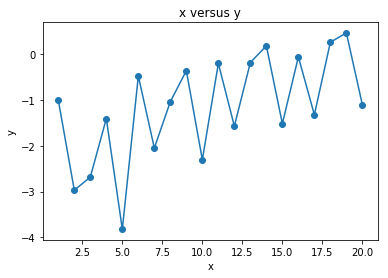

In [144]:
x_axis = list(range(1,21))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_axis,error)
ax.plot(x_axis,error)

ax.set_title('error')

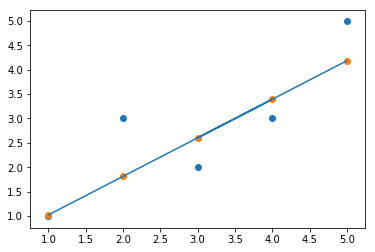

In [165]:
# Prediction
x = list(df['Unnamed: 1'][10:15])
x = [int(n) for n in x]

y = list(df['Unnamed: 2'][10:15])
y = [int(n) for n in y]

prediction = []
for i in x:
    prediction.append(B_0[len(B_0)-1]+i*B_1[len(B_1)-1])
prediction


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x,y)
ax.scatter(x,prediction)
ax.plot(x,prediction)

In [156]:
# Predicted-y
diff = []
for i in range(len(prediction)):
    diff.append(prediction[i]-y[i])
diff

[0.021336101059999946,
 -1.18822528889,
 0.3926519312100001,
 0.6022133211600003,
 -0.8169094587399996]

In [161]:
# squared error

squared_error = []

for i in diff:
    squared_error.append(i**2)
print(squared_error)
print("Sum："+str(sum(squared_error)))
RMSE = (sum(squared_error)/len(squared_error))**0.5
print("RMSE："+str(RMSE))

[0.0004552292084425308, 1.411879337157724, 0.15417553908294263, 0.3626608841825576, 0.6673410637788791]
Sum：2.596512053410546
RMSE：0.7206264015994065


# Chapter14
## 14.1 Tutorial Dataset

In [179]:
df = pd.read_csv('../data/csv/05-LogisticRegression.csv')


In [178]:
# import data
x_1_0 = list(df['Logistic Regression with Stochastic Gradient Descent'][3:8])
x_1_0 = [float(n) for n in x_1_0]

x_1_1 = list(df['Logistic Regression with Stochastic Gradient Descent'][8:13])
x_1_1 = [float(n) for n in x_1_1]


x_2_0 = list(df['Unnamed: 1'][3:8])
x_2_0 = [float(n) for n in x_2_0]

x_2_1 = list(df['Unnamed: 1'][8:13])
x_2_1 = [float(n) for n in x_2_1]

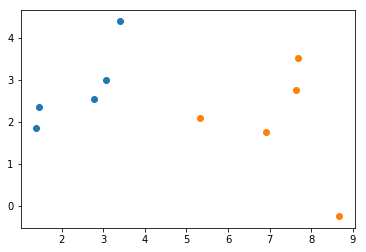

In [180]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(x_1_0,x_2_0)
ax.scatter(x_1_1,x_2_1)

In [190]:
bias = list(df['Unnamed: 1'][18:118])
bias = [int(n) for n in bias]

x1 = list(df['Unnamed: 2'][18:118])
x1 = [float(n) for n in x1]

x2 = list(df['Unnamed: 3'][18:118])
x2 = [float(n) for n in x2]

B0 = list(df['Unnamed: 5'][18:118])
B0 = [float(n) for n in B0]

B1 = list(df['Unnamed: 6'][18:118])
B1 = [float(n) for n in B1]

B2 = list(df['Unnamed: 7'][18:118])
B2 = [float(n) for n in B2]

In [193]:
# prediction
import math

prediction = []
for i in range(len(bias)):
    prediction.append(1/(1+math.exp(-(bias[i]*B0[i]+x1[i]*B1[i]+x2[i]*B2[i]))))
#prediction

[0.5,
 0.39741142305387483,
 0.21754589981437975,
 0.3263876379526889,
 0.18088488637456532,
 0.06377702208281255,
 0.23889457852068943,
 0.6144752961528799,
 0.93147281436113,
 0.885110978044225,
 0.6716895883283005,
 0.4482611029694069,
 0.3239707438883936,
 0.339538778104406,
 0.23513658747501623,
 0.23012742972472233,
 0.7270876522675829,
 0.9085822776562766,
 0.9777324575752405,
 0.9035121128328676,
 0.6108540597328599,
 0.35850760719565355,
 0.2405403085172301,
 0.3166697765660487,
 0.2390937724866225,
 0.3997256271657479,
 0.83333187626202,
 0.9464575768720475,
 0.9919944351387594,
 0.9269273010766884,
 0.5704119155046402,
 0.2996491881738678,
 0.19463167073697904,
 0.29650266703726263,
 0.24141132069129356,
 0.5698282115914146,
 0.8185015242615871,
 0.9503672366294709,
 0.9950825314190213,
 0.9159260998454256,
 0.5014626731892314,
 0.24380595212541292,
 0.14653819183837186,
 0.2710700725228452,
 0.22865307101618398,
 0.673397347705941,
 0.7870994035275785,
 0.9499961127388463,


## 14.3.2 Calculate New Coefficients

In [205]:
LR = float(df['Logistic Regression with Stochastic Gradient Descent'][15:16])
y = list(df['Unnamed: 4'][18:118])
y = [int(n) for n in y]

B0_t = []
for i in range(len(B0)):
    B0_t.append(B0[i]+LR*(y[i]-prediction[i])*prediction[i]*(1-prediction[i])*bias[i])
#B0_t

In [209]:
B1_t = []
for i in range(len(B1)):
    B1_t.append(B1[i]+LR*(y[i]-prediction[i])*prediction[i]*(1-prediction[i])*x1[i])
#B1_t

In [210]:
B2_t = []
for i in range(len(B2)):
    B2_t.append(B2[i]+LR*(y[i]-prediction[i])*prediction[i]*(1-prediction[i])*x2[i])
B2_t

[-0.0956451376125,
 -0.16308640672104574,
 -0.21197005059216711,
 -0.25180113736453463,
 -0.2759646153412964,
 -0.22969061305403682,
 -0.1429788500937615,
 -0.09445399110898525,
 -0.09477164606764972,
 -0.08247447174327535,
 -0.19581227034957033,
 -0.27437559541711326,
 -0.3680411648745346,
 -0.410305183406971,
 -0.44843232654202936,
 -0.3355254707096459,
 -0.30159301957275864,
 -0.2975586057975477,
 -0.29759381162717624,
 -0.28874000383975984,
 -0.3998467213370267,
 -0.458273562075495,
 -0.5162809564363702,
 -0.5543164072282221,
 -0.5935337003470503,
 -0.4743063669199448,
 -0.45980178614930634,
 -0.4583601599375026,
 -0.4583647769270105,
 -0.45315515149095076,
 -0.560105520230392,
 -0.6046676562083865,
 -0.6449416286747933,
 -0.6792708828416961,
 -0.7191303566540707,
 -0.6318448721596628,
 -0.6149502860532488,
 -0.6137063907867462,
 -0.6137081384393118,
 -0.6068936489904518,
 -0.7028177598772939,
 -0.7346704421139945,
 -0.7588633821365541,
 -0.7885932951250928,
 -0.8249524499956079,
 

In [213]:
# Sharp Prediction
sharp_prediction = []
for i in prediction:
    if i < 0.5:
        sharp_prediction.append(0)
    else:
        sharp_prediction.append(1)
#sharp_prediction

In [216]:
# Squared Error
squared_error = []
for i in range(len(prediction)):
    squared_error.append((prediction[i]-y[i])**2)
#squared_error

In [218]:
def split_list(l, n):
    for idx in range(0, len(l), n):
        yield l[idx:idx + n]

In [223]:
split_se = list(split_list(squared_error, 10))

RMSE = []

for i in split_se:
    RMSE.append((statistics.mean(i))**0.5)
RMSE

[0.47083223942568997,
 0.4016199246535001,
 0.3336695508712325,
 0.2875377560455622,
 0.24956579355038055,
 0.22219219417526545,
 0.20291820420527348,
 0.18811376825509654,
 0.17609058175252942,
 0.1659920198492711]

In [226]:
# Error
error = []
for i in range(len(sharp_prediction)):
    if sharp_prediction[i] == y[i]:
        error.append(0)
    else:
        error.append(1)
#error

In [232]:
# Accuracy
accuracy_list = []
error_list = list(split_list(error,10))
for i in error_list:
    accuracy_list.append((1-(sum(i)/len(i)))*100)
accuracy_list

[70.0, 80.0, 80.0, 90.0, 90.0, 100.0, 100.0, 100.0, 100.0, 100.0]

Text(0.5,1,'Accuracy')

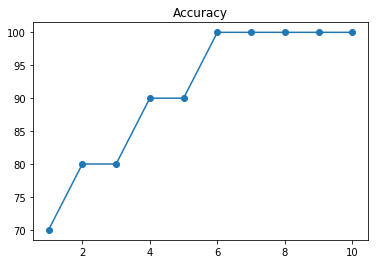

In [235]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
x_axis = list(range(1,11))
ax.scatter(x_axis,accuracy_list)
ax.plot(x_axis,accuracy_list)
ax.set_title("Accuracy")

Text(0.5,1,'RMSE')

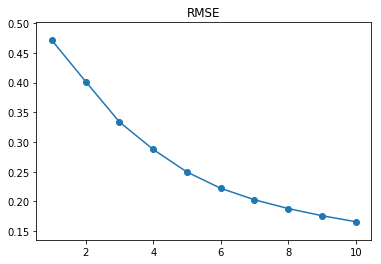

In [236]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
x_axis = list(range(1,11))
ax.scatter(x_axis,RMSE)
ax.plot(x_axis,RMSE)
ax.set_title("RMSE")

## 14.3.4 Make Predictions

In [245]:
# import data
x1 = list(df['Logistic Regression with Stochastic Gradient Descent'][125:135])
x1 = [float(i) for i in x1]

x2 = list(df['Unnamed: 1'][125:135])
x2 = [float(i) for i in x2]

-0.40660546387038243

In [247]:
# Prediction

prediction = []
for i in range(len(x1)):
    prediction.append(1/(1+math.exp(-(B0_t[len(B0_t)-1]+B1_t[len(B1_t)-1]*x1[i]+x2[i]*B2_t[len(B2_t)-1]))))
prediction

[0.29875698580885823,
 0.14595105606252287,
 0.08533326534406838,
 0.21973731439624578,
 0.24705900033905465,
 0.9547021348047449,
 0.8620341906530566,
 0.9717729050686137,
 0.999295452088035,
 0.9054893229517141]

In [248]:
# Crisp

crisp = []
for i in prediction:
    if i < 0.5:
        crisp.append(0)
    else:
        crisp.append(1)
crisp

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [257]:
y = list(df['Unnamed: 4'][125:135])
y = [int(n) for n in y]

# Error

error = []
for i in range(len(crisp)):
    if crisp[i] == y[i]:
        error.append(0)
    else:
        error.append(1)
error

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [260]:
# Accuracy

accuracy = (1-(sum(error)/len(error)))*100
accuracy

100.0

## Chapter 16

### 16.2 Tutorial Dataset

In [261]:
df = pd.read_csv('../data/csv/06-LinearDiscriminantAnalysis.csv')

In [273]:
# import data
x0 = df['Linear Discriminant Analysis'][3:23]
x0 = [float(i) for i in x0]

x1 = df['Linear Discriminant Analysis'][23:43]
x1 = [float(i) for i in x1]

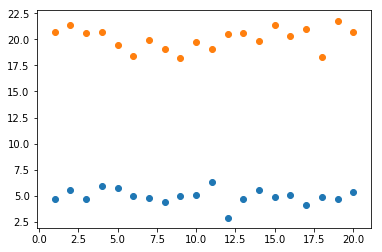

In [275]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
x_axis = list(range(1,21))
ax.scatter(x_axis,x0)
ax.scatter(x_axis,x1)

In [279]:
mean_x0 = statistics.mean(x0)
mean_x1 = statistics.mean(x1)

print(mean_x0,mean_x1)

4.975415507 20.087062921


In [281]:
# Probability
p0 = len(x0)/(len(x0)+len(x1))
p1 = len(x1)/(len(x0)+len(x1))
print(p0,p1)

0.5 0.5


In [287]:
# SquaredDifference
squared_difference0 = []
for i in x0:
    squared_difference0.append((i-mean_x0)**2)

squared_difference1 = []
for i in x1:
    squared_difference1.append((i-mean_x1)**2)
print(sum(squared_difference0),sum(squared_difference1))

10.158230131719309 21.493167084411787


In [297]:
# variance
variance = (1/(len(x0)+len(x1)-2))*(sum(squared_difference0)+sum(squared_difference1))
variance

0.8329315056876604

## 16.4 Making Predictions

In [304]:
# import data
x = list(df['Linear Discriminant Analysis'][98:140])
x = [float(i) for i in x]

In [385]:
discriminant0 = []
discriminant1 = []

for i in x:
    discriminant0.append(i*(mean_x0/variance)-(mean_x0**2/(2*variance))+math.log(p0))
    discriminant1.append(i*(mean_x1/variance)-(mean_x1**2/(2*variance))+math.log(p1))
#discriminant1

In [383]:
# prediction
prediction = []
for i in range(len(discriminant1)):
    if discriminant0[i] > discriminant1[i]:
        prediction.append(0)
    else:
        prediction.append(1)
#prediction

In [387]:
y = list(df['Unnamed: 4'][98:140])
y = [int(i) for i in y]

In [390]:
# Error
error = []
for i in range(len(y)):
    if prediction[i] == y[i]:
        error.append(0)
    else:
        error.append(1)
#error

In [392]:
# Accuracy
accuracy = (1-(sum(error)/len(error)))*100
accuracy

100.0